In [5]:
import numpy as np

In [214]:
n = 1000

In [215]:
trust = np.random.rand(n, n); trust
# (truster, trustee)

array([[0.76851135, 0.10826634, 0.17836202, ..., 0.63662816, 0.04604382,
        0.36847234],
       [0.25645688, 0.28228599, 0.51301072, ..., 0.8042283 , 0.08626835,
        0.79303336],
       [0.55040419, 0.39939942, 0.32788953, ..., 0.22337431, 0.78637809,
        0.23322059],
       ...,
       [0.17320252, 0.31262941, 0.01320076, ..., 0.78651756, 0.46839981,
        0.43933699],
       [0.60686173, 0.68775943, 0.86349872, ..., 0.7504883 , 0.11492072,
        0.15447954],
       [0.45842608, 0.70044047, 0.59687788, ..., 0.17963592, 0.39614946,
        0.20132162]])

In [216]:
def set_trust(fr, to, n):
    trust[fr, to] = n

In [217]:
set_trust(0, 0, 2)
set_trust(1, 2, 3)
set_trust(5, 6, 2)
set_trust(2, 3, 2)

trust

array([[2.        , 0.10826634, 0.17836202, ..., 0.63662816, 0.04604382,
        0.36847234],
       [0.25645688, 0.28228599, 3.        , ..., 0.8042283 , 0.08626835,
        0.79303336],
       [0.55040419, 0.39939942, 0.32788953, ..., 0.22337431, 0.78637809,
        0.23322059],
       ...,
       [0.17320252, 0.31262941, 0.01320076, ..., 0.78651756, 0.46839981,
        0.43933699],
       [0.60686173, 0.68775943, 0.86349872, ..., 0.7504883 , 0.11492072,
        0.15447954],
       [0.45842608, 0.70044047, 0.59687788, ..., 0.17963592, 0.39614946,
        0.20132162]])

In [218]:
pretrusted = np.random.rand(n)
def iter(t0, matrix):
    new_matrix = matrix.copy()
    for i, row in enumerate(matrix):
        row_sum = row.sum()
        if row_sum == 0:
            new_matrix[i] = pretrusted
        else:
            new_matrix[i] = row / row_sum
    t1 = new_matrix.T @ t0
    return t1  # new trust vector

In [219]:
tx = np.random.rand(n) * 1e2
def run_to_converge(tx, m):
    print(trust)
    delta_sums = []
    for i in range(0, 25):
        t1 = iter(tx, m)
        delta = t1 - tx
        delta_sums.append(np.abs(delta).sum())
        tx = t1

    import matplotlib.pyplot as plt
    plt.plot(delta_sums)
    plt.xlabel('Iteration')
    plt.ylabel('Sum of Δ (absolute)')
    plt.yscale('log')
    plt.title('Convergence of Trust Vector')
    plt.grid(True)
    plt.show()
    return tx

[[2.         0.10826634 0.17836202 ... 0.63662816 0.04604382 0.36847234]
 [0.25645688 0.28228599 3.         ... 0.8042283  0.08626835 0.79303336]
 [0.55040419 0.39939942 0.32788953 ... 0.22337431 0.78637809 0.23322059]
 ...
 [0.17320252 0.31262941 0.01320076 ... 0.78651756 0.46839981 0.43933699]
 [0.60686173 0.68775943 0.86349872 ... 0.7504883  0.11492072 0.15447954]
 [0.45842608 0.70044047 0.59687788 ... 0.17963592 0.39614946 0.20132162]]


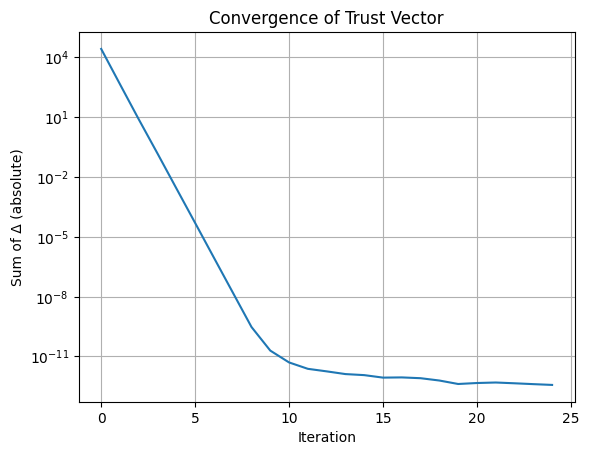

In [220]:
tx = run_to_converge(tx, trust)

[[2.         0.10826634 0.17836202 ... 0.63662816 0.04604382 0.36847234]
 [0.25645688 0.28228599 3.         ... 0.8042283  0.08626835 0.79303336]
 [0.55040419 0.39939942 0.32788953 ... 0.22337431 0.78637809 0.23322059]
 ...
 [0.17320252 0.31262941 0.01320076 ... 0.78651756 0.46839981 0.43933699]
 [0.60686173 0.68775943 0.86349872 ... 0.7504883  0.11492072 0.15447954]
 [0.45842608 0.70044047 0.59687788 ... 0.17963592 0.39614946 0.20132162]]


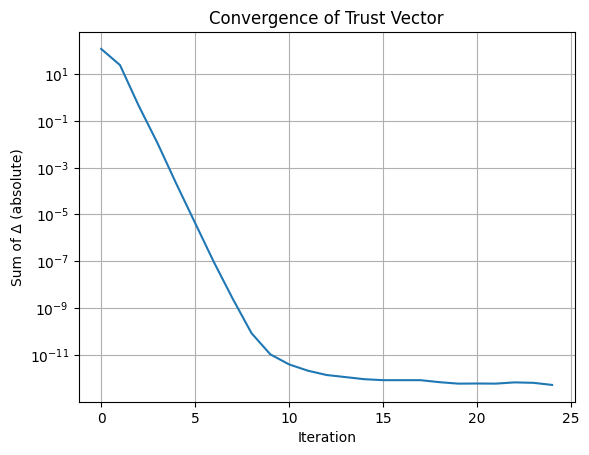

In [221]:
set_trust(5, 6, 2e4)
set_trust(2, 3, 2e2)
tx = run_to_converge(tx, trust)

In [222]:
tx[6]

92.39584615162904

In [223]:
def iter_n(n):
    t1 = tx
    for i in range(0, n):
        t1 = iter(t1, trust)
    return t1

In [228]:
tx = np.zeros(n)
tx[1] = 1000
tx[2] = 1000
trust = np.zeros((n, n))

In [241]:
set_trust(2, 6, 1)
set_trust(3, 6, 0)

rx = iter_n(10)
rx[6] / np.average(rx)

1.9605752268831438

In [236]:
set_trust(2, 6, 0)
set_trust(3, 6, 1)

rx = iter_n(10)
rx[6] / np.average(rx)

1.9612121067548205

In [237]:
set_trust(2, 6, 2)
set_trust(1, 6, 2)
set_trust(3, 6, 0)

rx = iter_n(10)
rx[6] / np.average(rx)

1.9632864961318892

In [238]:
set_trust(2, 6, 0)
set_trust(1, 6, 0)
set_trust(3, 6, 0)

rx = iter_n(10)
rx[6] / np.average(rx)

1.9583679891892156